In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## ANALÍSIS GENERAL ##   

In [66]:
df = pd.read_csv("../data-pruebaspro/train.csv") #Cargado directamente desde archivos del pc, que está en una carpeta hermana
d = df.copy()

In [67]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


## Exploración del dataframe ##

In [68]:
d.columns #Ver columnas

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [69]:
d.shape #Dimensión

(692500, 21)

In [70]:
d.dtypes  #Tipos de datos en las columnas

ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD     object
ESTU_HORASSEMANATRABAJA            object
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_EDUCACIONPADRE                object
FAMI_TIENELAVADORA                 object
FAMI_TIENEAUTOMOVIL                object
ESTU_PRIVADO_LIBERTAD              object
ESTU_PAGOMATRICULAPROPIO           object
FAMI_TIENECOMPUTADOR               object
FAMI_TIENEINTERNET.1               object
FAMI_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL                 object
coef_1                            float64
coef_2                            float64
coef_3                            float64
coef_4                            float64
dtype: object

In [71]:
d.head(10) #Primeros 10 datos

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


In [72]:
d.tail(10) #Últimos 10 datos

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
692490,403947,20195,PSICOLOGIA,BOLIVAR,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.236,0.304,0.268,0.305
692491,157529,20212,LICENCIATURA EN EDUCACION PREESCOLAR,BOYACA,No pagó matrícula,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.224,0.292,0.273,0.320
692492,584597,20183,LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA,NARIÑO,Menos de 500 mil,Menos de 10 horas,Estrato 1,Si,Primaria incompleta,No,...,N,Si,Si,Si,Primaria incompleta,alto,0.163,0.400,0.254,0.294
692493,725949,20203,DERECHO,CORDOBA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Educación profesional incompleta,Si,...,N,No,No,Si,Educación profesional completa,medio-alto,0.173,0.410,0.212,0.328
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Técnica o tecnológica completa,alto,0.487,0.180,0.251,0.187


In [73]:
d.describe() #Estadísticas descripticas de columnas numéricas

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [74]:
#Conteo de valores nulos por columna
d.isna().sum() 

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [75]:
#Obtener datos con valores numéricos
numeric_data = d._get_numeric_data()
numeric_data

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
0,904256,20212,0.322,0.208,0.310,0.267
1,645256,20212,0.311,0.215,0.292,0.264
2,308367,20203,0.297,0.214,0.305,0.264
3,470353,20195,0.485,0.172,0.252,0.190
4,989032,20212,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...
692495,25096,20195,0.237,0.271,0.271,0.311
692496,754213,20212,0.314,0.240,0.278,0.260
692497,504185,20183,0.286,0.240,0.314,0.287
692498,986620,20195,0.132,0.426,0.261,0.328


### Clasificación de columnas no numéricas ###

En esta parte:

- Se explora las columnas que las variables no son de tipo numéricas

- Se conocen los valores únicos de cada columna categórica

- Se hace gráfico de frecuencia para columnas categóricas 

In [76]:
categorical_col =  [i for i in d.columns if not i in numeric_data]
categorical_col

['ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL']

In [77]:
import numpy as np
dic = {}  
for col in categorical_col:
    dic[col] = list((np.unique(d[col].dropna()))) #CONOCER VALORES UNICOS DE COLS CATEGORICAS MEDIANTE SU NOMBRE


In [78]:
print(dic['FAMI_TIENEINTERNET'])

['No', 'Si']


In [79]:
for i in categorical_col:
    print(i , d[i].value_counts())

ESTU_PRGM_ACADEMICO ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64
ESTU_PRGM_DEPARTAMENTO ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR        

In [80]:
d.loc[d['ESTU_VALORMATRICULAUNIVERSIDAD']== 'No pagó matrícula']

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
60,815971,20212,INGENIERIA DE SISTEMAS,BOGOTÁ,No pagó matrícula,Más de 30 horas,Estrato 2,Si,No Aplica,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.242,0.272,0.268,0.299
119,219016,20203,QUIMICA FARMACEUTICA,ANTIOQUIA,No pagó matrícula,Menos de 10 horas,Estrato 1,Si,Primaria incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.163,0.410,0.221,0.317
151,167490,20195,"LICENCIATURA EN LENGUA CASTELLANA,INGLES Y FRA...",BOGOTÁ,No pagó matrícula,0,Estrato 1,Si,Secundaria (Bachillerato) incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,alto,0.167,0.386,0.246,0.301
224,52576,20203,INGENIERIA DE ALIMENTOS,CORDOBA,No pagó matrícula,Entre 11 y 20 horas,Estrato 1,No,Primaria incompleta,Si,...,N,No,NaN,No,Secundaria (Bachillerato) incompleta,bajo,0.170,0.407,0.258,0.294
227,552643,20212,LICENCIATURA EN MATEMATICAS,ATLANTICO,No pagó matrícula,0,NaN,NaN,Primaria incompleta,NaN,...,N,No,NaN,NaN,Primaria completa,bajo,0.005,0.034,0.031,0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692305,41912,20212,LICENCIATURA EN CIENCIAS NATURALES Y EDUCACION...,CESAR,No pagó matrícula,NaN,Estrato 3,Si,Educación profesional completa,NaN,...,N,No,NaN,Si,Técnica o tecnológica completa,medio-bajo,0.286,0.211,0.282,0.281
692383,868457,20203,INGENIERIA DE SISTEMAS,NORTE SANTANDER,No pagó matrícula,Entre 11 y 20 horas,Estrato 1,Si,Primaria incompleta,Si,...,N,No,Si,Si,Primaria completa,medio-alto,0.145,0.390,0.248,0.307
692433,681116,20183,INGENIERIA MECANICA,ANTIOQUIA,No pagó matrícula,Menos de 10 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Primaria completa,alto,0.200,0.278,0.267,0.287
692455,111728,20212,INGENIERIA ELECTRICA,BOGOTÁ,No pagó matrícula,Más de 30 horas,Estrato 3,Si,Técnica o tecnológica completa,No,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.298,0.221,0.281,0.279


### Gráfica de frecuencias en cada columna ###

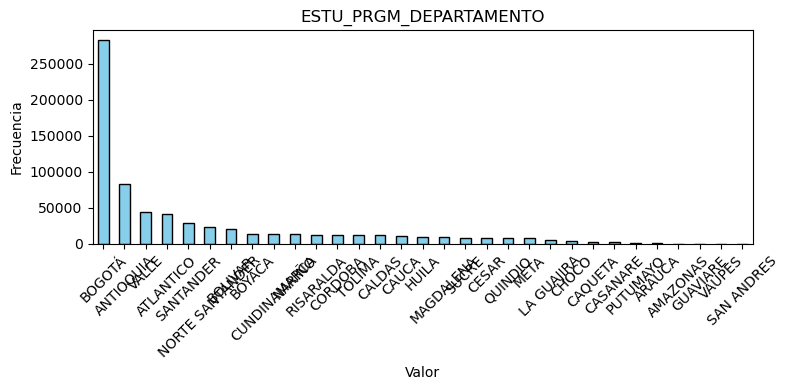

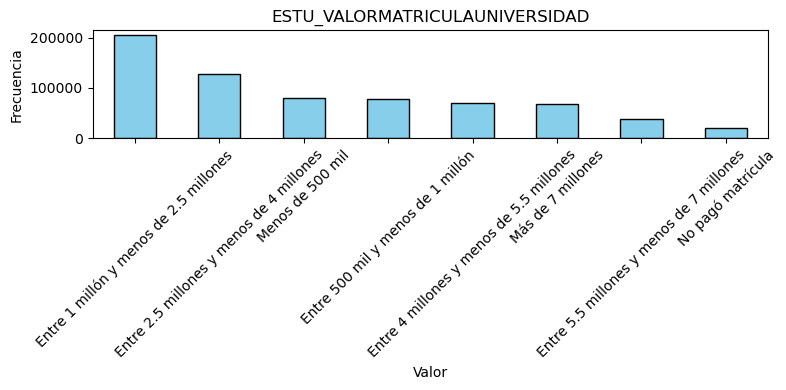

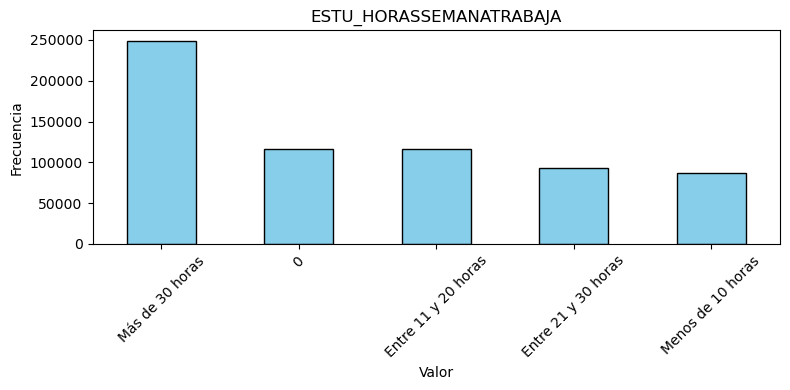

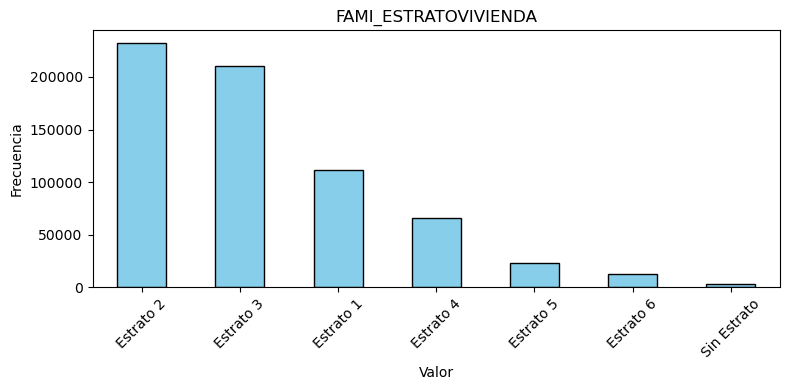

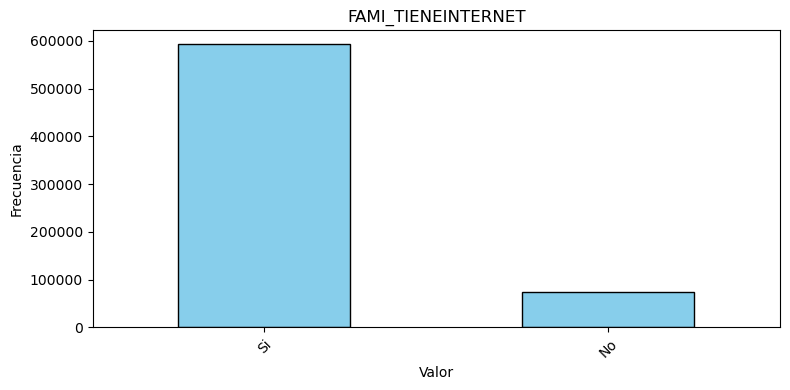

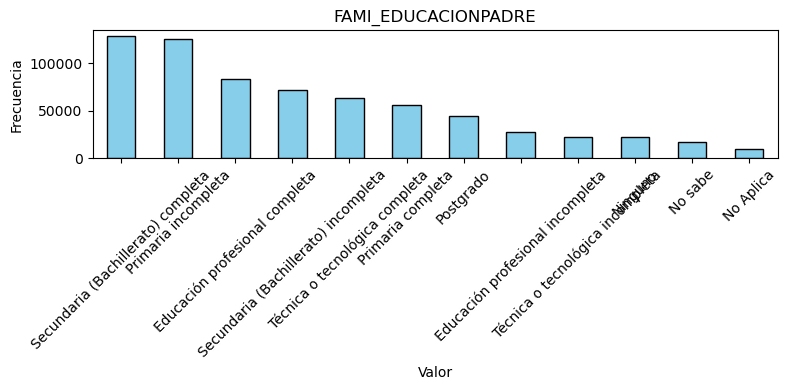

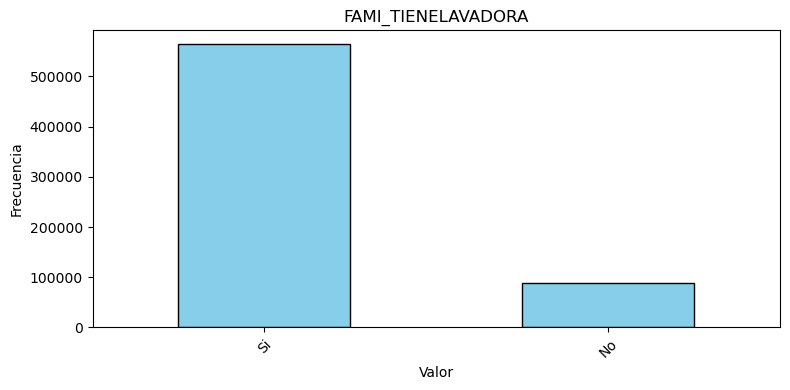

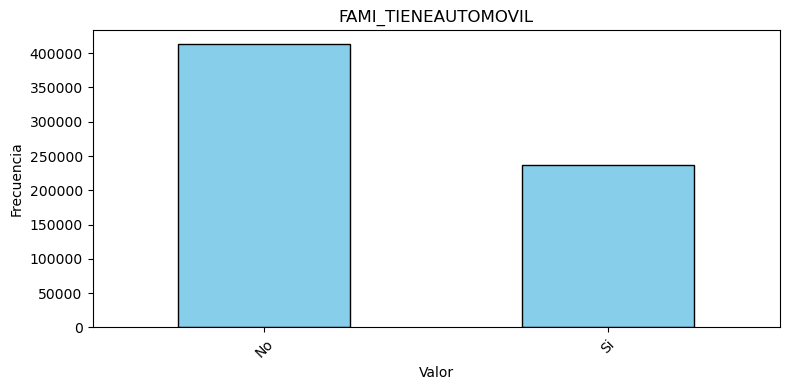

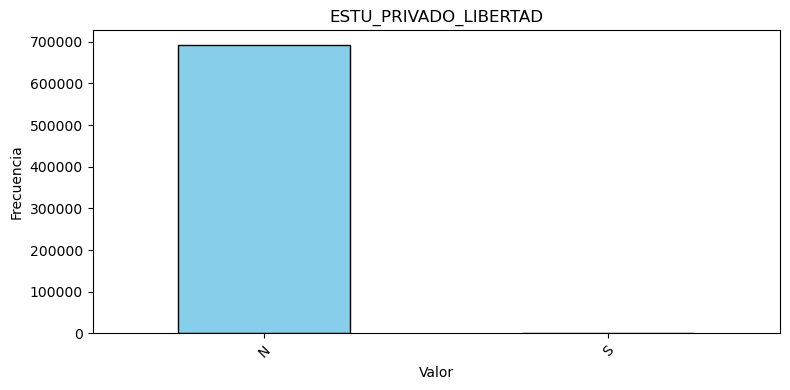

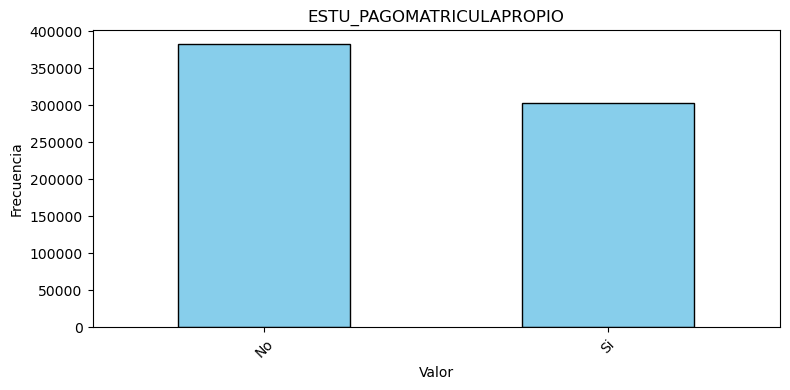

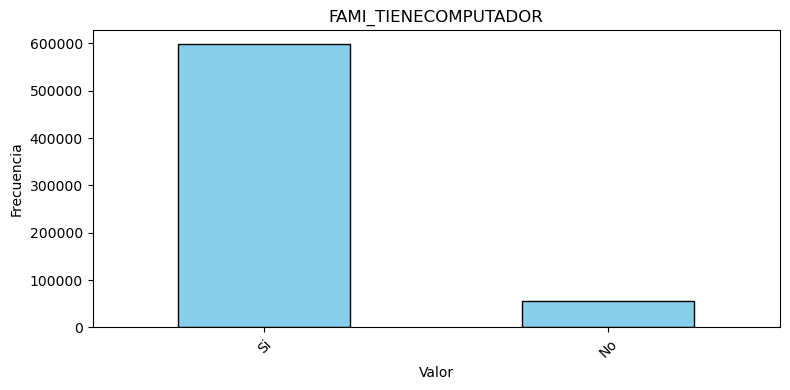

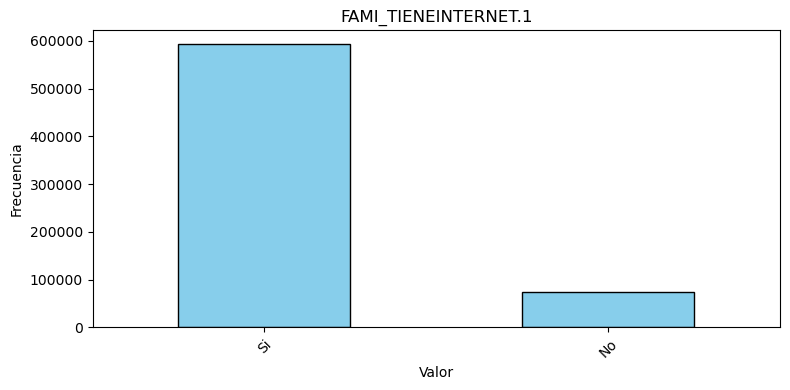

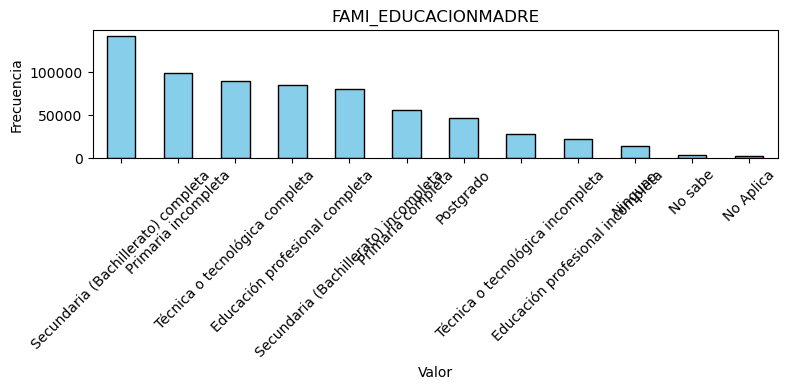

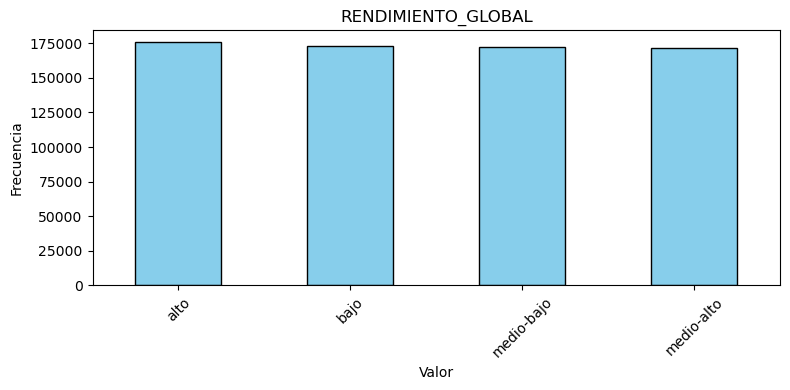

In [81]:
for col in categorical_col[1:]:
    valores = d[col].dropna() 
    conteo = valores.value_counts() 

    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Valores únicos por columna y valores faltantes ##

In [82]:
d["ESTU_VALORMATRICULAUNIVERSIDAD"].unique() 

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [83]:
#Conteo de valores NaN en el dataframe por cada columna 
d.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [84]:
d["PERIODO"].unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

In [85]:
d["FAMI_EDUCACIONMADRE"].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

## PREPROCESADO DE LOS DATOS ##

#### Quitar tíldes a variables ####
Esto con la finalidad de que más adelante no se repitan variables del mismo tipo y se tomen por separado 

In [86]:
import unicodedata

# Función para quitar tildes
def quitar_tildes(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFD', texto)
        texto = ''.join([c for c in texto if unicodedata.category(c) != 'Mn'])
    return texto



In [87]:
d[categorical_col] = d[categorical_col].applymap(quitar_tildes)


/tmp/ipykernel_11637/1093102503.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d[categorical_col] = d[categorical_col].applymap(quitar_tildes)


In [88]:
d['ESTU_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Mas de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

Se elimina ESTU_PRIVADO_LIBERTAD ya que no es una variable que me brinde información

In [89]:
d.drop('ESTU_PRIVADO_LIBERTAD', axis=1, inplace=True)
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Tecnica o tecnologica incompleta,Si,Si,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Tecnica o tecnologica completa,Si,No,No,Si,No,Tecnica o tecnologica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millon,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,Entre 1 millon y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


#### Columnas de rangos en un valor ####

ESTU_VALORMATRICULAUNIVERSIDAD -> paso de rangos a la mitad del rango

ESTU_HORASSEMANATRABAJA -> paso de rangos a la mitad del rango

FAMI_ESTRATOVIVIENDA -> Valor numerico (Estrato 1 = 1)

In [90]:
rango_ingresos = {
    'Menos de 500 mil': 0.25,  # millones
    'Entre 500 mil y menos de 1 millon': 0.75,
    'Entre 1 millon y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'Mas de 7 millones': 8.0,  # puedes estimar un valor promedio superior
    'No pago matricula': 0.0,  # si lo interpretas como costo cero
}
d['ESTU_VALORMATRICULAUNIVERSIDAD'] = d['ESTU_VALORMATRICULAUNIVERSIDAD'].map(rango_ingresos)


In [91]:
rango_horas = {
    '0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Mas de 30 horas': 35,  # posibilidad de ajuste
}
d['ESTU_HORASSEMANATRABAJA'] = d['ESTU_HORASSEMANATRABAJA'].map(rango_horas)


In [92]:
estrato_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0  # o puedes usar -1 o np.nan si prefieres distinguirlo
}
d['FAMI_ESTRATOVIVIENDA'] = d['FAMI_ESTRATOVIVIENDA'].map(estrato_map)


In [93]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,Si,Tecnica o tecnologica incompleta,Si,Si,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,No,Tecnica o tecnologica completa,Si,No,No,Si,No,Tecnica o tecnologica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,Si,Secundaria (Bachillerato) completa,Si,No,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,Si,No sabe,Si,No,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,Si,Primaria completa,Si,Si,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,Si,Secundaria (Bachillerato) completa,Si,No,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,Si,Primaria incompleta,Si,No,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,Si,Secundaria (Bachillerato) completa,Si,No,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,No,Primaria completa,No,No,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [94]:
d['FAMI_EDUCACIONPADRE'].unique()

array(['Tecnica o tecnologica incompleta',
       'Tecnica o tecnologica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educacion profesional completa',
       'Educacion profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

### Conversión de variables categóricas a formato numérico ###

Se cambia la columna FAMI_EDUCACIONMADRE y FAMI_EDUCACIONPADRE por label encoding, ya que tiene un 'orden' se aplica esto.

Para 'No Aplica', 'No sabe' se cambio por NaN

In [95]:
nivel_educativo_map = {
    'Ninguno': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Tecnica o tecnologica incompleta': 5,
    'Tecnica o tecnologica completa': 6,
    'Educacion profesional incompleta': 7,
    'Educacion profesional completa': 8,
    'Postgrado': 9
}


In [96]:
#Se cambia para la variable FAMI_EDUCACIONMADRE
d['FAMI_EDUCACIONMADRE'] = d["FAMI_EDUCACIONMADRE"].map(nivel_educativo_map)

d['FAMI_EDUCACIONMADRE'] = d['FAMI_EDUCACIONMADRE'].replace(['No Aplica', 'No sabe'], np.nan)

#Se cambia para la variable FAMI_EDUCACIONPADRE
d['FAMI_EDUCACIONPADRE'] = d["FAMI_EDUCACIONPADRE"].map(nivel_educativo_map)

d['FAMI_EDUCACIONPADRE'] = d['FAMI_EDUCACIONPADRE'].replace(['No Aplica', 'No sabe'], np.nan)
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,Si,5.0,Si,Si,No,Si,Si,9.0,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,No,6.0,Si,No,No,Si,No,5.0,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,Si,4.0,Si,No,No,No,Si,4.0,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,Si,NaN,Si,No,No,Si,Si,4.0,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,Si,2.0,Si,Si,No,Si,Si,2.0,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,Si,4.0,Si,No,Si,Si,Si,3.0,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,Si,1.0,Si,No,No,Si,Si,3.0,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,Si,4.0,Si,No,Si,Si,Si,3.0,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,No,2.0,No,No,Si,Si,No,2.0,bajo,0.132,0.426,0.261,0.328


In [97]:
d.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               48999
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               28599
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [98]:
d["ESTU_PRGM_ACADEMICO"].unique()

array(['ENFERMERIA', 'DERECHO', 'MERCADEO Y PUBLICIDAD',
       'ADMINISTRACION DE EMPRESAS', 'PSICOLOGIA', 'MEDICINA VETERINARIA',
       'INGENIERIA MECANICA', 'ADMINISTRACION EN SALUD OCUPACIONAL',
       'INGENIERIA INDUSTRIAL', 'ADMINISTRACION FINANCIERA',
       'HOTELERIA Y TURISMO', 'LICENCIATURA EN CIENCIAS SOCIALES',
       'LICENCIATURA EN PEDAGOGIA INFANTIL', 'COMUNICACION SOCIAL',
       'CIENCIA POLITICA',
       'PROFESIONAL EN GESTION DE LA SEGURIDAD Y LA SALUD LABORAL',
       'MAESTRO EN MUSICA', 'INGENIERIA MECATRONICA', 'TRABAJO SOCIAL',
       'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL',
       'INGENIERIA CIVIL', 'CONTADURIA PUBLICA',
       'ADMINISTRACION EN SALUD', 'ESTADISTICA',
       'LICENCIATURA EN BIOLOGIA', 'INGENIERIA AGROINDUSTRIAL',
       'ZOOTECNIA', 'COMUNICACION AUDIOVISUAL',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES',
       'COMUNICACION SOCIAL  - PERIODISMO',
       'SEGURIDAD Y SALUD EN EL TRABAJO', 'MEDIC

Se cambia la columna de RENDIMIENTO_GLOBAL por tipo numérica con label encoding 

In [99]:
orden = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].map(orden)

In [100]:
#Se identifica que una columna está repetida
np.all(d["FAMI_TIENEINTERNET.1"]) == np.all(d["FAMI_TIENEINTERNET"]) 

True

In [101]:
#Se elimina ya que está repetida 
d.drop("FAMI_TIENEINTERNET.1", axis=1, inplace=True)
d.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO',
       'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [49]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,Si,5.0,Si,Si,No,Si,9.0,2,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,No,6.0,Si,No,No,Si,5.0,0,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,Si,4.0,Si,No,No,No,4.0,0,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,Si,NaN,Si,No,No,Si,4.0,3,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,Si,2.0,Si,Si,No,Si,2.0,1,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,Si,4.0,Si,No,Si,Si,3.0,2,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,Si,1.0,Si,No,No,Si,3.0,0,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,Si,4.0,Si,No,Si,Si,3.0,1,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,No,2.0,No,No,Si,Si,2.0,0,0.132,0.426,0.261,0.328


In [102]:
#Se selecciona columnas que se tienen en tipo objet (Si - No), para pasarlas en 1 ó 0
cols_object = d.select_dtypes(include='object').columns
cols_bool = cols_object.delete(5)
cols_bool = cols_bool[2:]
cols_bool

Index(['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENECOMPUTADOR'],
      dtype='object')

In [103]:
cols_object

Index(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO',
       'FAMI_TIENECOMPUTADOR'],
      dtype='object')

In [105]:
d['ESTU_PAGOMATRICULAPROPIO'] = d['ESTU_PAGOMATRICULAPROPIO'].map({'Si': 1, 'No': 0})

In [107]:
for i in cols_bool:
    d[str(i)] = d[str(i)].map({'Si': 1, 'No': 0})
d.dtypes

ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD    float64
ESTU_HORASSEMANATRABAJA           float64
FAMI_ESTRATOVIVIENDA              float64
FAMI_TIENEINTERNET                float64
FAMI_EDUCACIONPADRE               float64
FAMI_TIENELAVADORA                float64
FAMI_TIENEAUTOMOVIL               float64
ESTU_PAGOMATRICULAPROPIO          float64
FAMI_TIENECOMPUTADOR              float64
FAMI_EDUCACIONMADRE               float64
RENDIMIENTO_GLOBAL                  int64
coef_1                            float64
coef_2                            float64
coef_3                            float64
coef_4                            float64
dtype: object

In [108]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,1.0,5.0,1.0,1.0,0.0,1.0,9.0,2,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,0.0,6.0,1.0,0.0,0.0,1.0,5.0,0,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,4.0,0,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,1.0,NaN,1.0,0.0,0.0,1.0,4.0,3,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,2,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,0,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,1,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,0,0.132,0.426,0.261,0.328


### Análisis datos faltantes NaN ###

In [112]:
d.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               48999
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_EDUCACIONMADRE               28599
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [114]:
#Función para comparar variables con datos faltantes con respecto 
# a los que tienen información de manera gráfica 
def plot_nan_vs_notnull_individual(df):
    total_rows = len(df)

    for col in df.columns:
        n_nan = df[col].isnull().sum()
        if n_nan == 0:
            continue  # saltar columnas sin NaN
        
        n_notnull = total_rows - n_nan
        
        # Crear gráfico
        plt.figure(figsize=(4, 5))
        plt.bar(['Con dato', 'Faltante'], [n_notnull, n_nan], color=['skyblue', 'salmon'])
        plt.title(f'{col} ({(n_nan/total_rows)*100:.1f}% faltantes)')
        plt.ylabel('Cantidad de filas')
        plt.tight_layout()
        plt.show()

In [115]:
#Matriz para visualizar datos faltantes en todo el dataframe
def plot_missing_matrix(df):
    """
    Visualiza los valores faltantes en un DataFrame como una matriz,
    donde los valores faltantes se ven blancos y los presentes se ven negros.
    """
    fig, ax = plt.subplots(figsize=(18, 12))
    
    # Creamos la matriz: 1 si el valor está presente, 0 si falta
    not_missing = (~df.isna()).values.astype(int)
    
    # Visualizamos: 1 (presente) = negro, 0 (faltante) = blanco
    ax.imshow(not_missing.T, cmap='binary', aspect='auto', interpolation='none')
    
    # Etiquetas de columnas
    ax.set_yticks(np.arange(df.shape[1]))
    ax.set_yticklabels(df.columns)
    
    # Etiquetas de filas espaciadas
    ax.set_xticks(np.linspace(0, df.shape[0], 10))
    ax.set_xlabel("Número de fila")
    ax.set_title("Matriz de valores faltantes (blanco = falta, negro = presente)")

    plt.tight_layout()
    plt.show()

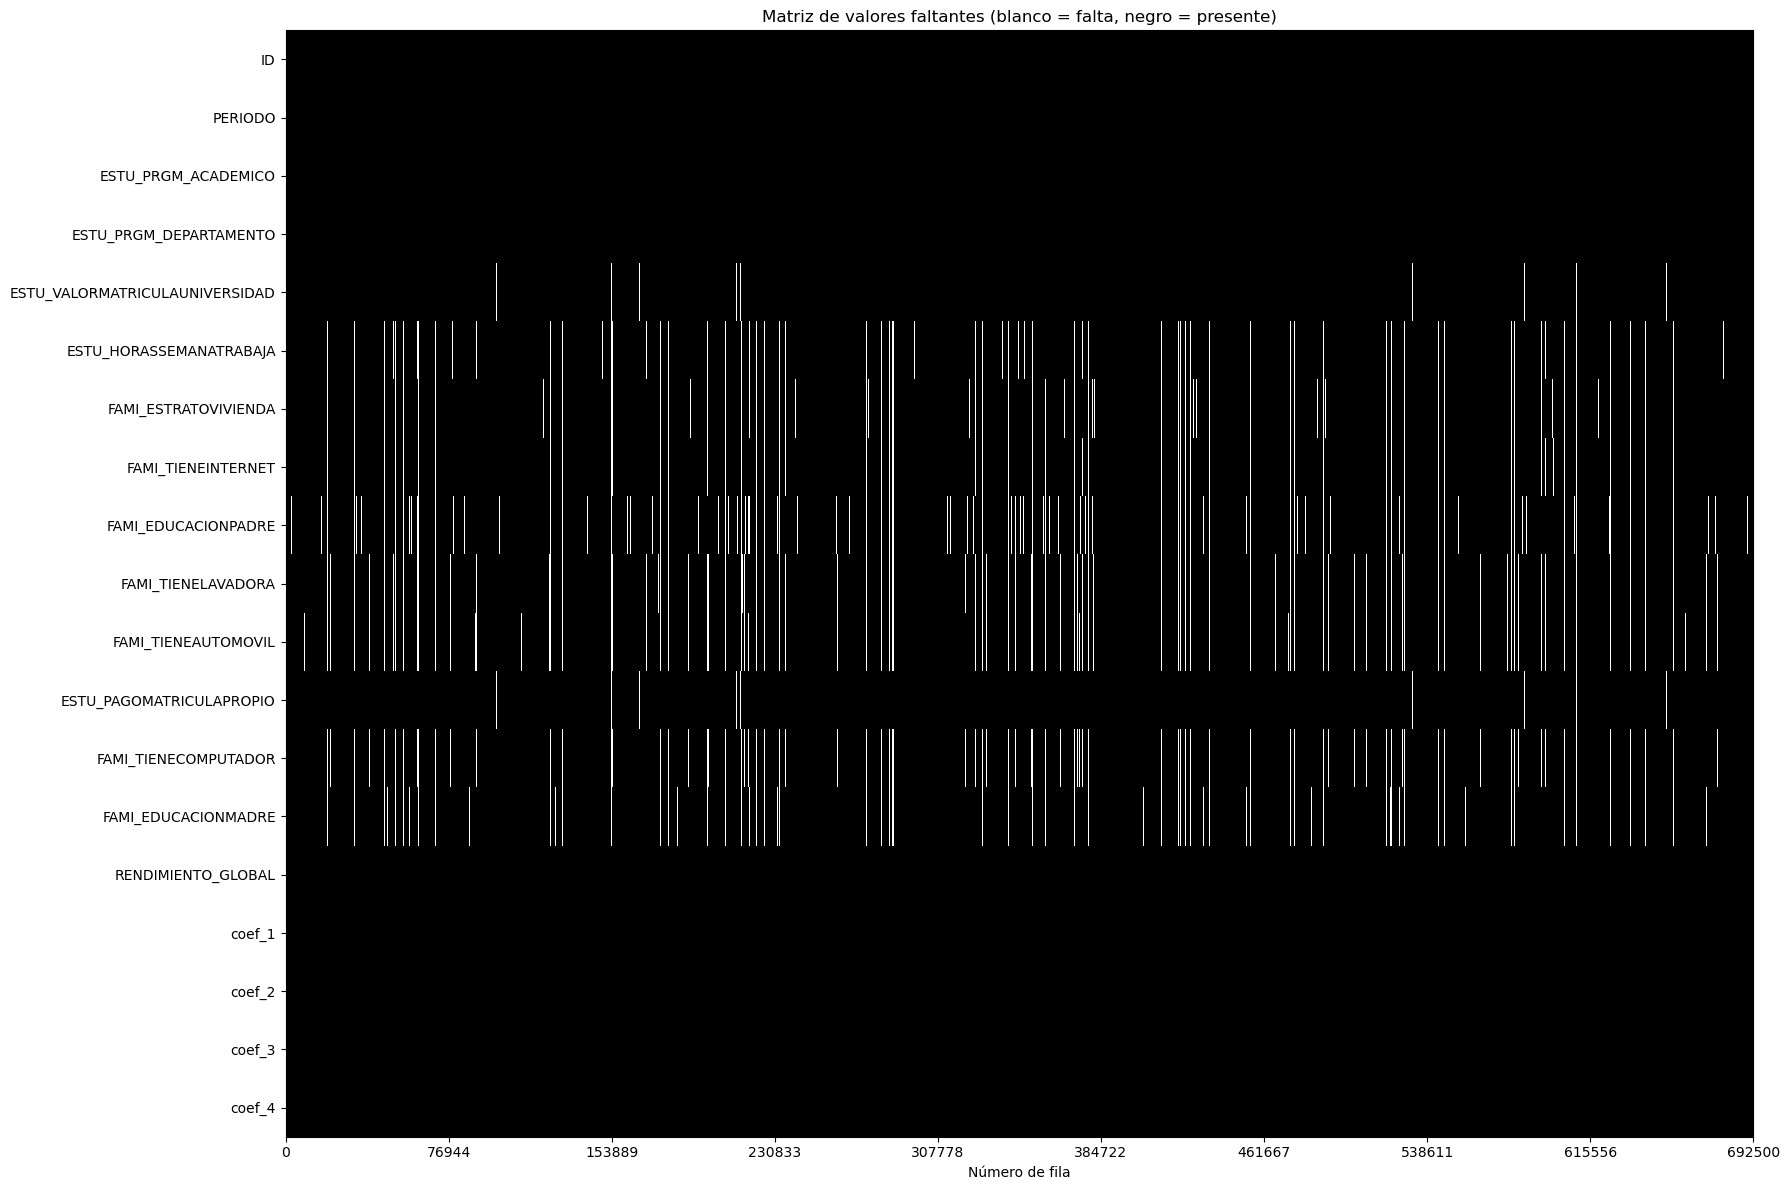

In [116]:
plot_missing_matrix(d)

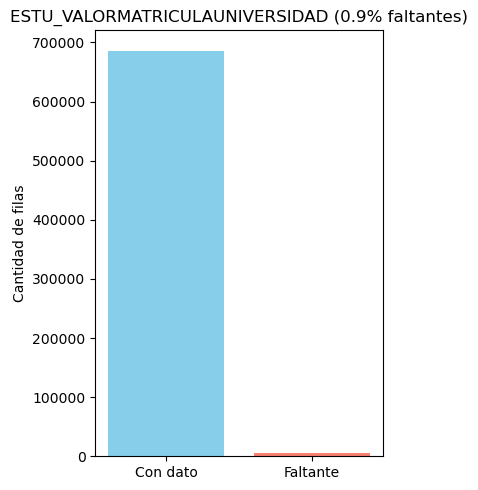

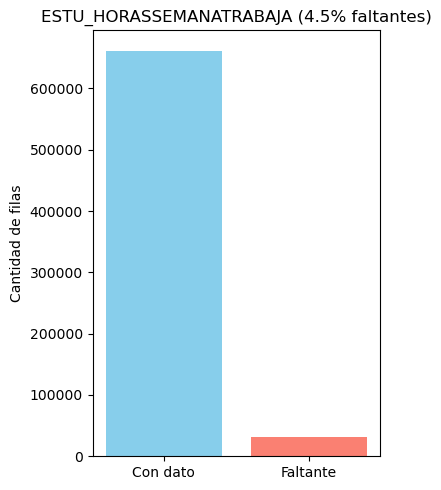

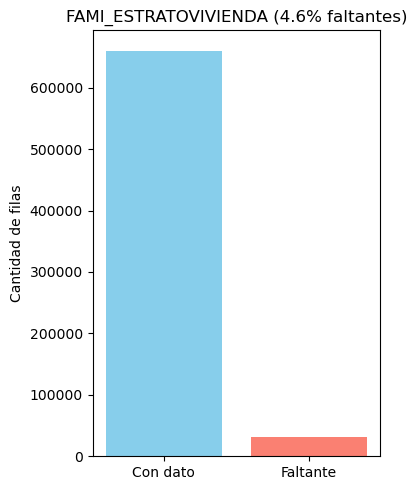

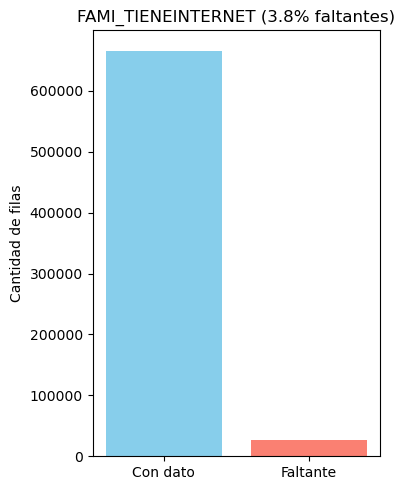

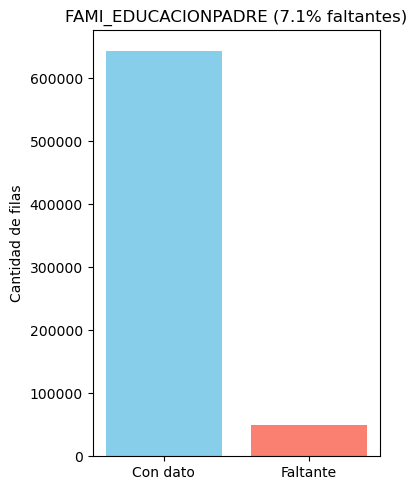

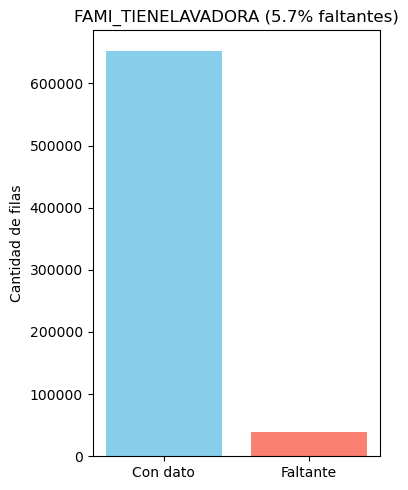

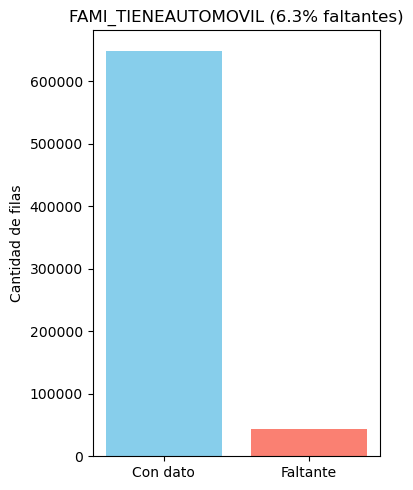

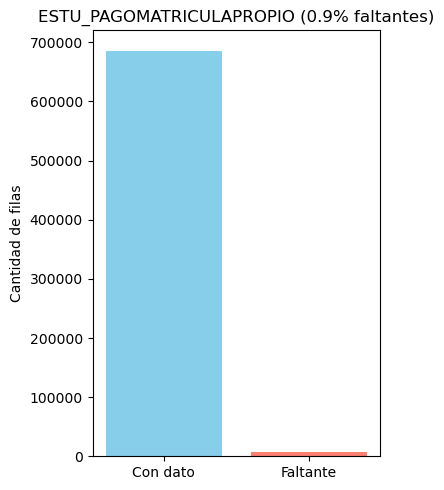

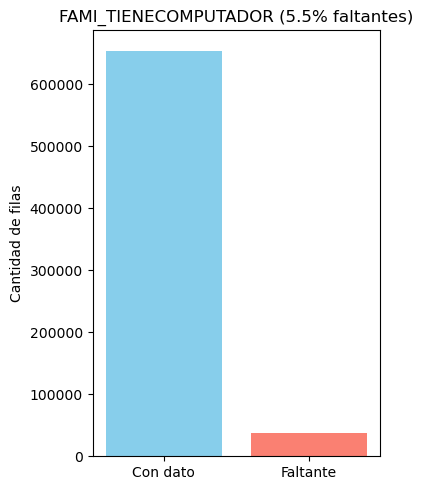

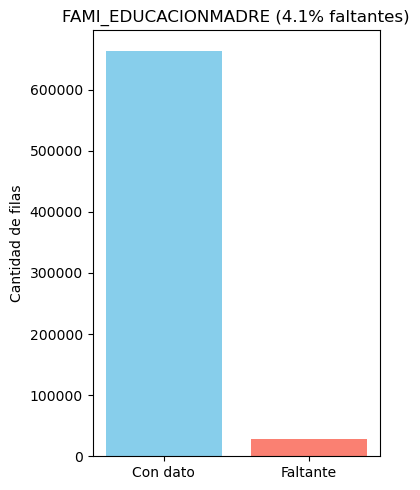

In [117]:
plot_nan_vs_notnull_individual(d)

### Imputación de valores faltantes ###

In [119]:
#Selección de columnas que contienen valores faltantes
col_moda = ['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET','FAMI_EDUCACIONPADRE','FAMI_TIENELAVADORA',
            'FAMI_TIENEAUTOMOVIL','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENECOMPUTADOR','FAMI_EDUCACIONMADRE']


In [ ]:
#Imputación de datos faltantes por el valor de mayor frecuencia en cada una de las columnas 
#Se hace inicialmente este método, luego se plantea evaluar con otros métodos
for col in col_moda:
    moda = d[col].mode()
    if not moda.empty:
        d[col].fillna(moda[0], inplace=True)

d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,1.0,5.0,1.0,1.0,0.0,1.0,9.0,2,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,0.0,6.0,1.0,0.0,0.0,1.0,5.0,0,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,4.0,0,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,1.0,4.0,1.0,0.0,0.0,1.0,4.0,3,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,2,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,0,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,1,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,0,0.132,0.426,0.261,0.328


In [121]:
d.isnull().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD        0
ESTU_HORASSEMANATRABAJA               0
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                    0
FAMI_EDUCACIONPADRE                   0
FAMI_TIENELAVADORA                    0
FAMI_TIENEAUTOMOVIL                   0
ESTU_PAGOMATRICULAPROPIO              0
FAMI_TIENECOMPUTADOR                  0
FAMI_EDUCACIONMADRE                   0
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [122]:
#La columna FAMI_ESTRATOVIVIENDA, por tener dos categorías con frecuencia similares, se decide imputar aleatoriamente con estos dos valroes
def rellenar_nan_mitad_mitad(df, columna, semilla=None):
    if semilla is not None:
        np.random.seed(semilla)

    # Copiar columna
    col = df[columna].copy()

    # Detectar posiciones de los NaN
    nan_mask = col.isna()
    n_nan = nan_mask.sum()

    if n_nan == 0:
        return col  # Nada que rellenar

    # Obtener los dos valores más frecuentes
    top_vals = col.value_counts().nlargest(2).index.tolist()
    if len(top_vals) < 2:
        raise ValueError("La columna no tiene suficientes valores distintos para seleccionar dos más frecuentes.")

    val1, val2 = top_vals[0], top_vals[1]

    # Determinar cuántos de cada uno (reparto lo más equitativo posible)
    mitad = n_nan // 2
    resto = n_nan - mitad

    valores_a_insertar = [val1]*mitad + [val2]*resto
    np.random.shuffle(valores_a_insertar)

    # Asignar a las posiciones faltantes
    col.loc[nan_mask] = valores_a_insertar

    return col


In [123]:
d['FAMI_ESTRATOVIVIENDA'] = rellenar_nan_mitad_mitad(d, 'FAMI_ESTRATOVIVIENDA', semilla=123)
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,1.0,5.0,1.0,1.0,0.0,1.0,9.0,2,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,0.0,6.0,1.0,0.0,0.0,1.0,5.0,0,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,4.0,0,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,1.0,4.0,1.0,0.0,0.0,1.0,4.0,3,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,2,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,0,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,1,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,0,0.132,0.426,0.261,0.328


In [124]:
d.isna().sum()

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
coef_1                            0
coef_2                            0
coef_3                            0
coef_4                            0
dtype: int64

In [125]:
categorical_col_new = ['ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL']

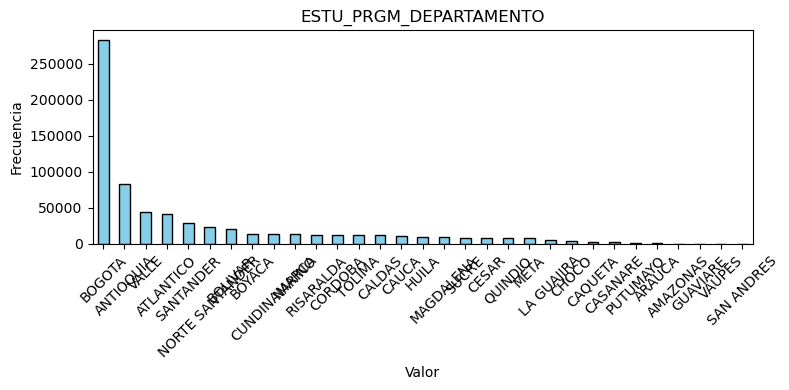

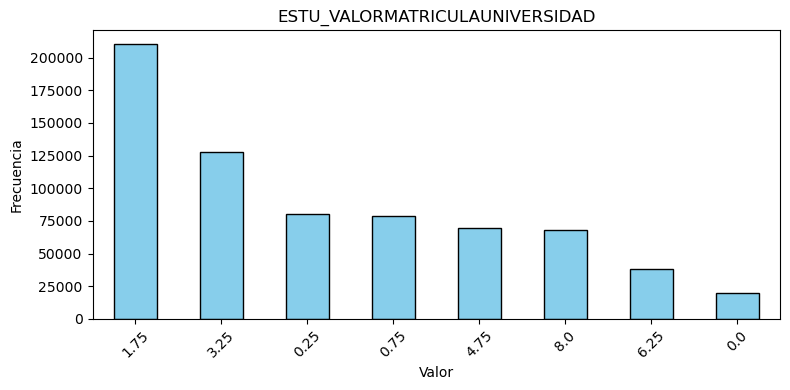

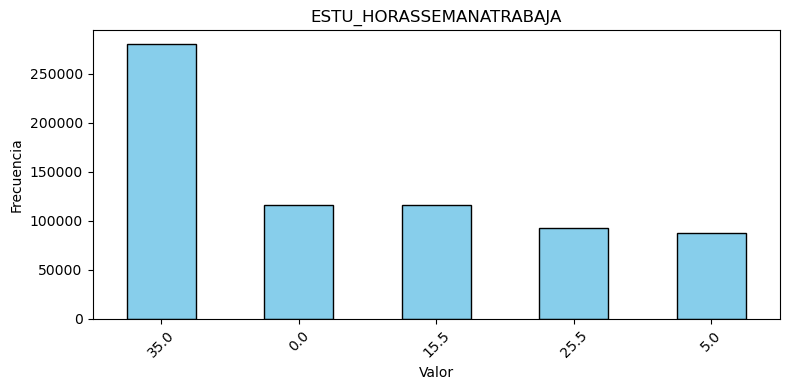

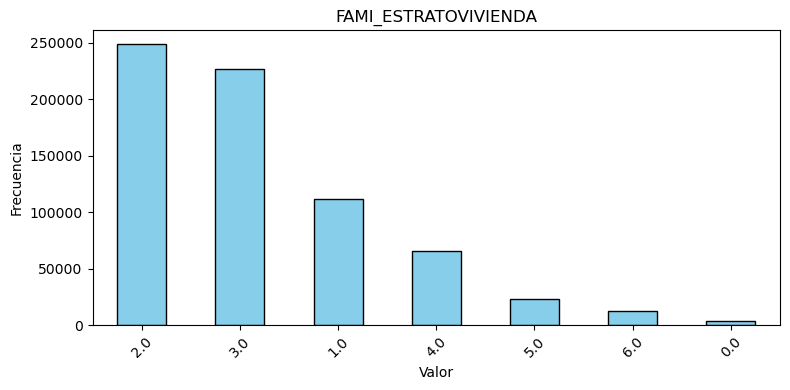

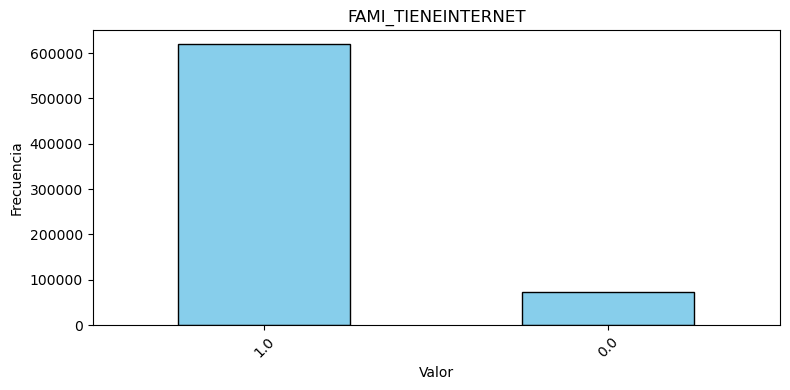

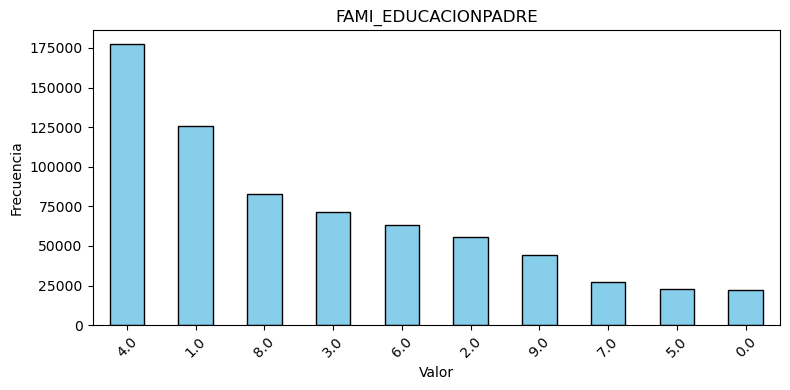

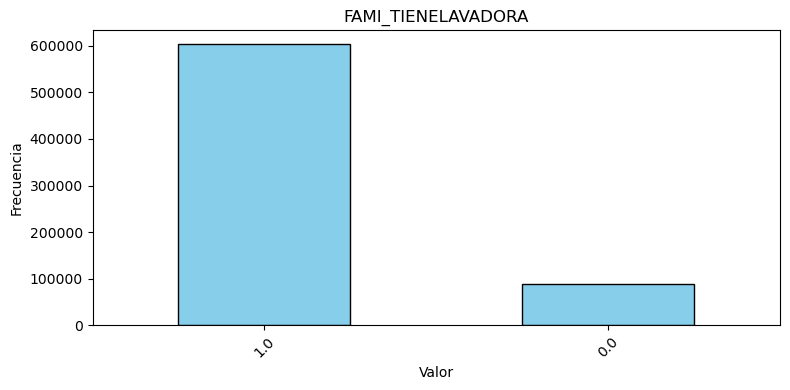

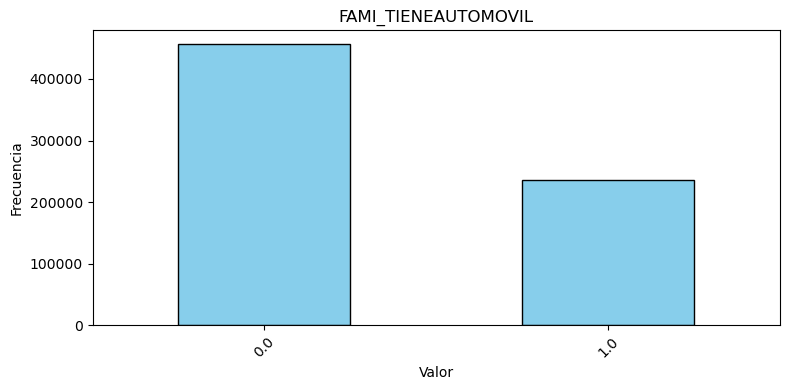

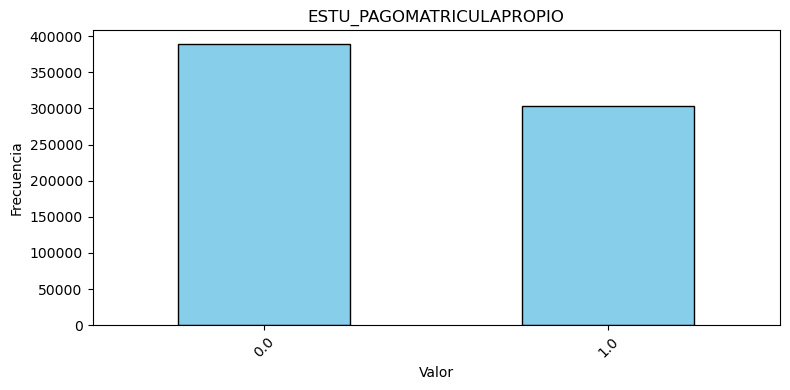

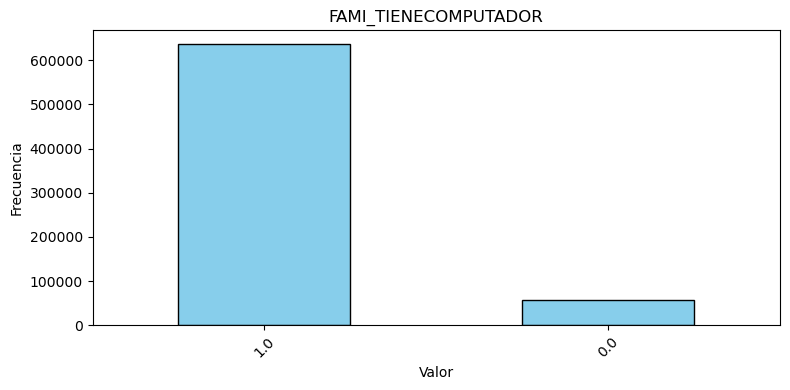

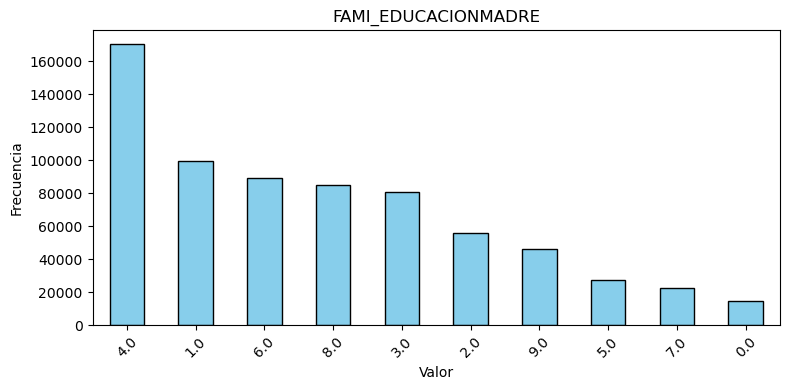

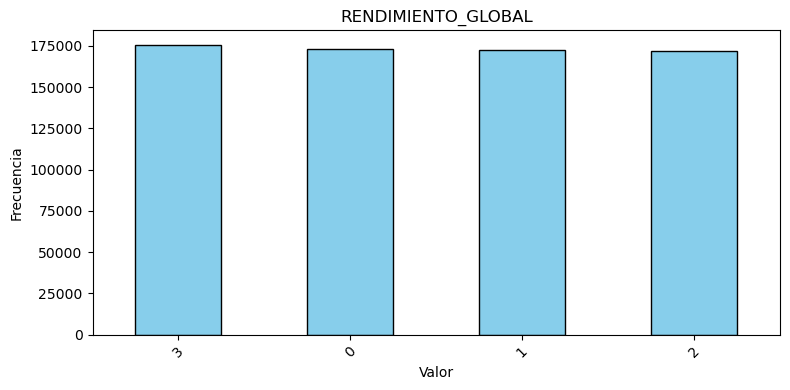

In [126]:
for col in categorical_col_new[1:]:
    valores = d[col].dropna() 
    conteo = valores.value_counts() 

    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Convierte variables categóricas nominales en one hot enconding ###

In [127]:
#Las columnas que no tenian un orden marcado ('ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO') se aplicó ONEHOTENCODING
d_encoded = pd.get_dummies(d, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'])
d_encoded

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,904256,20212,6.25,5.0,3.0,1.0,5.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,645256,20212,3.25,0.0,3.0,0.0,6.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,308367,20203,3.25,35.0,3.0,1.0,4.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,470353,20195,4.75,0.0,4.0,1.0,4.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,989032,20212,3.25,25.5,3.0,1.0,2.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,0.75,15.5,2.0,1.0,4.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
692496,754213,20212,3.25,35.0,3.0,1.0,1.0,1.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
692497,504185,20183,1.75,5.0,3.0,1.0,4.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
692498,986620,20195,3.25,5.0,1.0,0.0,2.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False


In [128]:
periodos = d_encoded["PERIODO"].unique()

In [130]:
periodos 

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

Se pasa la columna PERIODO por un orden numérico de acuerdo al año en el que se presentó la prueba

 20183,  20184 -> 0 

 20195, 20194, 20196 -> 1

 20203, 20202 -> 2

 20212, 20213  -> 3

In [ ]:
#Codificación de la columna periodo ->
d_encoded['PERIODO'] = d_encoded['PERIODO'].astype(str).str[:4].astype(int)
años_unicos = sorted(d_encoded['PERIODO'].unique())  # asegura el orden cronológico
diccionario_codificacion = {año: idx for idx, año in enumerate(años_unicos)}


d_encoded['PERIODO'] = d_encoded['PERIODO'].map(diccionario_codificacion)
d_encoded

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,904256,3,6.25,5.0,3.0,1.0,5.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,645256,3,3.25,0.0,3.0,0.0,6.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,308367,2,3.25,35.0,3.0,1.0,4.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,470353,1,4.75,0.0,4.0,1.0,4.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,989032,3,3.25,25.5,3.0,1.0,2.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,1,0.75,15.5,2.0,1.0,4.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
692496,754213,3,3.25,35.0,3.0,1.0,1.0,1.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
692497,504185,0,1.75,5.0,3.0,1.0,4.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
692498,986620,1,3.25,5.0,1.0,0.0,2.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
d_encoded["ESTU_HORASSEMANATRABAJA"].value_counts() 

ESTU_HORASSEMANATRABAJA
35.0    280209
0.0     116550
15.5    115857
25.5     92693
5.0      87191
Name: count, dtype: int64

### SE COMPARAN DATAFRAME INICIAL (SIN LIMPIEZA) CON DATAFRAME PREPROCESADO

In [132]:
df.describe()

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [135]:
df.shape

(692500, 21)

In [137]:
df.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [133]:
d_encoded.describe()

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,1.508933,2.855232,20.798159,2.520516,0.894069,4.194195,0.870994,0.341186,0.438702,0.918084,4.429035,1.505227,0.268629,0.259996,0.262087,0.262903
std,285585.209455,1.106851,2.349822,13.910186,1.101680,0.307749,2.606564,0.335207,0.474108,0.496229,0.274237,2.524638,1.121061,0.122130,0.093480,0.058862,0.067944
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,1.000000,0.750000,5.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,1.000000,1.750000,25.500000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,4.000000,2.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,2.000000,4.750000,35.000000,3.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,3.000000,8.000000,35.000000,6.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,9.000000,3.000000,0.657000,0.487000,0.320000,0.332000


In [136]:
d_encoded.shape

(692500, 835)

In [139]:
d_encoded.isna().sum()

ID                                  0
PERIODO                             0
ESTU_VALORMATRICULAUNIVERSIDAD      0
ESTU_HORASSEMANATRABAJA             0
FAMI_ESTRATOVIVIENDA                0
                                   ..
ESTU_PRGM_DEPARTAMENTO_SANTANDER    0
ESTU_PRGM_DEPARTAMENTO_SUCRE        0
ESTU_PRGM_DEPARTAMENTO_TOLIMA       0
ESTU_PRGM_DEPARTAMENTO_VALLE        0
ESTU_PRGM_DEPARTAMENTO_VAUPES       0
Length: 835, dtype: int64